<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brevin Brown
ID: 801096385
ECGR 4105
Homework 2

Problem 1

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns




dataset=pd.read_csv('diabetes.csv')
print(dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [169]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:,8].values

XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size=0.2,random_state=0)
sc_X = StandardScaler()
XTrain = sc_X.fit_transform(XTrain)
XTest = sc_X.transform(XTest)

classifier = LogisticRegression(random_state=0)
classifier.fit(XTrain,YTrain)


LogisticRegression(random_state=0)

In [170]:
YPredict = classifier.predict(XTest)
YPredict[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [171]:
cnf_matrix = confusion_matrix(YTest, YPredict)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [172]:
print("Accuracy:",metrics.accuracy_score(YTest, YPredict))
print("Precision:",metrics.precision_score(YTest, YPredict))
print("Recall:",metrics.recall_score(YTest, YPredict))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted label')

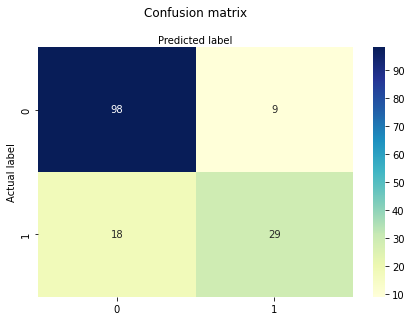

In [173]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 2

In [174]:
XTrain2, XTest2, YTrain2, YTest2 = train_test_split(X,Y, test_size=0.2,random_state=0)
sc = StandardScaler()
XTrain2Std = sc.fit_transform(XTrain2)
XTest2Std = sc.transform(XTest2)
C = [10,1,.1,.01]
for c in C:
  clf = LogisticRegression(penalty='l1',C=c,solver='liblinear')
  clf.fit(XTrain2, YTrain2)
  print('C:',c)
  print('Training accuracy:',clf.score(XTrain2Std, YTrain2))
  print('Test accuracy:',clf.score(XTest2Std, YTest2))
  print('')

C: 10
Training accuracy: 0.6400651465798045
Test accuracy: 0.6948051948051948

C: 1
Training accuracy: 0.6400651465798045
Test accuracy: 0.6948051948051948

C: 0.1
Training accuracy: 0.6400651465798045
Test accuracy: 0.6948051948051948

C: 0.01
Training accuracy: 0.6156351791530945
Test accuracy: 0.6688311688311688



In [175]:
kfold = KFold(n_splits=5, random_state=0,shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model,X,Y,cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100))

kfold2 = KFold(n_splits=10, random_state=0,shuffle=True)
results2 = cross_val_score(model,X,Y,cv=kfold2)
print("Accuracy: %.3f%% (%.3f%%)" % (results2.mean()*100, results2.std()*100))

Accuracy: 76.555% (3.185%)
Accuracy: 76.818% (3.744%)


In [176]:
model.fit(XTrain2,YTrain2)
predicted = model.predict(XTest2)
report = classification_report(YTest2, predicted)
matrix = confusion_matrix(YTest2, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Text(0.5, 257.44, 'Predicted label')

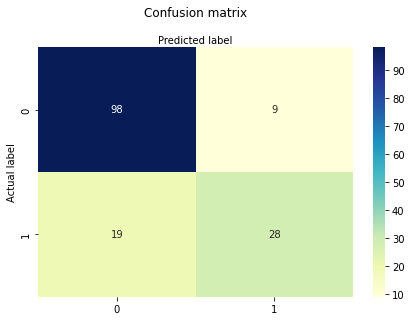

In [177]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 3

In [178]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [182]:
breast_input = pd.DataFrame(X)
breast_input.head()
breast_output = pd.DataFrame(Y)

In [184]:
XTrainB, XTestB, YTrainB, YTestB = train_test_split(breast_input,breast_output, test_size=0.2,random_state=0)
sc_X = StandardScaler()
XTrainB = sc_X.fit_transform(XTrainB)
XTestB = sc_X.transform(XTestB)

classifierB = LogisticRegression(random_state=0)
classifierB.fit(XTrainB,YTrainB)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [186]:
YPredictB = classifierB.predict(XTestB)
YPredictB[0:10]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [187]:
cnf_matrixB = confusion_matrix(YTestB, YPredictB)
cnf_matrixB

array([[45,  2],
       [ 2, 65]])

In [188]:
print("Accuracy:",metrics.accuracy_score(YTestB, YPredictB))
print("Precision:",metrics.precision_score(YTestB, YPredictB))
print("Recall:",metrics.recall_score(YTestB, YPredictB))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

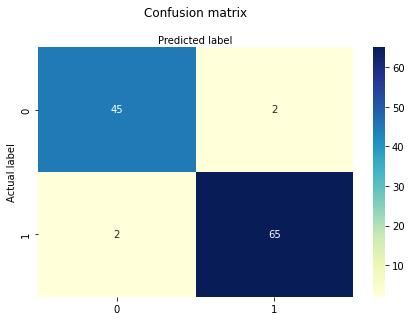

In [189]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

With weight penalty added

In [190]:
classifier2 = LogisticRegression(penalty='l2',random_state=0)
classifier2.fit(XTrainB,YTrainB)
YPredictW = classifier2.predict(XTestB)
YPredictW[0:10]

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [191]:
cnf_matrixBW = confusion_matrix(YTestB, YPredictW)
cnf_matrixBW

array([[45,  2],
       [ 2, 65]])

In [192]:
print("Accuracy:",metrics.accuracy_score(YTestB, YPredictW))
print("Precision:",metrics.precision_score(YTestB, YPredictW))
print("Recall:",metrics.recall_score(YTestB, YPredictW))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 257.44, 'Predicted label')

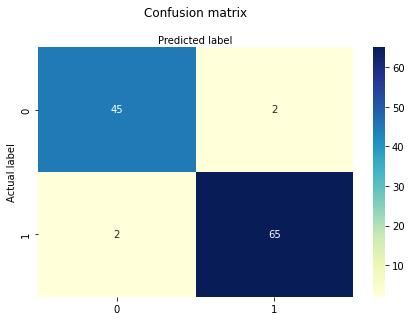

In [193]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixBW), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')